In [1]:
import pandas as pd
import numpy as np
import pybaseball as pyb
import matplotlib.pyplot as plt
import seaborn as sns

/Users/bradypinter/PycharmProjects/baseballDashboard/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
baseball_data = pd.read_parquet('data_complete.parquet')

In [6]:
surgery_yes = baseball_data[baseball_data['surgery']==1]
surgery_yes

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,surgery,X
109482,SI,2022-10-21,92.5,-1.37,6.60,"Musgrove, Joe",664761,605397,double,hit_into_play,...,6.0,2.0,NaN,1.0,2.13,0.73,0.73,36.1,1,1.0
109483,SL,2022-10-21,82.6,-1.30,6.54,"Musgrove, Joe",592206,605397,double,hit_into_play,...,6.0,2.0,NaN,1.0,4.10,-1.45,-1.45,35.9,1,2.0
109484,SL,2022-10-21,83.9,-1.32,6.43,"Musgrove, Joe",592206,605397,None,swinging_strike,...,6.0,2.0,NaN,1.0,3.79,-1.46,-1.46,35.1,1,3.0
109485,SL,2022-10-21,83.5,-1.37,6.51,"Musgrove, Joe",592206,605397,None,called_strike,...,6.0,2.0,NaN,1.0,3.80,-1.53,-1.53,34.2,1,4.0
109486,CH,2022-10-21,86.0,-1.75,6.37,"Musgrove, Joe",547180,605397,field_out,hit_into_play,...,6.0,2.0,NaN,1.0,2.72,0.40,-0.40,29.6,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181372,None,2018-03-08,NaN,NaN,NaN,"Severino, Luis",664068,622663,None,ball,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,71891.0
181373,None,2018-03-08,NaN,NaN,NaN,"Severino, Luis",664068,622663,None,ball,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,71892.0
181374,None,2018-03-08,NaN,NaN,NaN,"Severino, Luis",664068,622663,None,called_strike,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,71893.0
181375,None,2018-03-08,NaN,NaN,NaN,"Severino, Luis",596451,622663,field_out,hit_into_play,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,71894.0


In [6]:
test = baseball_data['player_name'].unique()
test

array(['Cole, Gerrit', 'Bibee, Tanner', 'Lively, Ben', ...,
       'Hardy, Blaine', 'Beede, Tyler', 'Severino, Luis'], dtype=object)

In [4]:
baseball_data.head(3)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,surgery,X
0,SL,2024-10-15,89.7,-2.31,5.91,"Cole, Gerrit",657041,543037,walk,ball,...,5.0,1.0,10.0,2.0,2.55,-0.44,-0.44,40.5,0,NaN
1,SI,2024-10-15,95.6,-2.02,6.13,"Cole, Gerrit",657041,543037,NaN,foul,...,5.0,1.0,10.0,2.0,1.17,1.40,1.40,46.6,0,NaN
2,FF,2024-10-15,97.7,-2.19,6.02,"Cole, Gerrit",657041,543037,NaN,ball,...,5.0,1.0,10.0,2.0,0.95,0.62,0.62,40.4,0,NaN


In [5]:
baseball_data['player_name'].value_counts()

player_name
Severino, Luis    3442
Bieber, Shane     3003
Ray, Robbie       2785
Sale, Chris       2731
Paxton, James     2638
                  ... 
Colina, Edwar        5
Cahill, Trevor       4
Luplow, Jordan       3
Junis, Jakob         2
Harper, Ryne         2
Name: count, Length: 1015, dtype: int64

In [6]:
#Filter set here for now - will be apart of the file itself to be called
pitcher_filter = baseball_data[baseball_data['player_name'] == 'Bieber, Shane']

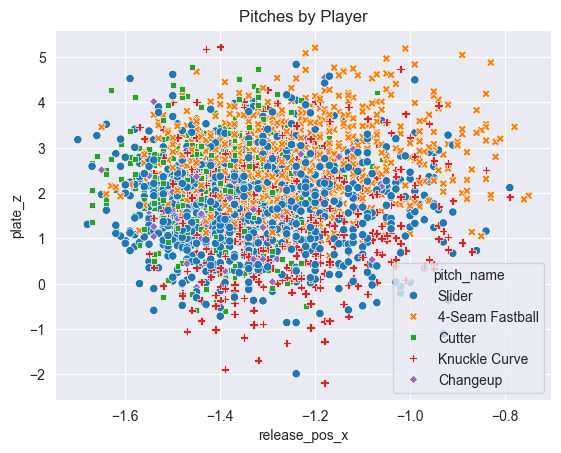

In [7]:
#Seaborn Version
sns.scatterplot(data = pitcher_filter, x = 'release_pos_x', y = 'plate_z', hue = 'pitch_name', style = 'pitch_name')
plt.title("Pitches by Player")
plt.show()

In [14]:
hi =pitcher_filter['pitch_name'].unique()
hi

array(['Slider', '4-Seam Fastball', 'Cutter', 'Knuckle Curve', 'Changeup'],
      dtype=object)

In [15]:
from dash import Dash, html, dcc, Input, Output, ctx
import plotly.express as px
import pandas as pd

In [4]:
baseball_data.to_parquet('data_complete.parquet')

In [7]:
baseball_data = pd.read_parquet('data_complete.parquet')
player_list = baseball_data['player_name'].unique()
surgery_list = baseball_data['surgery'].unique()

In [8]:
player_list

array(['Cole, Gerrit', 'Bibee, Tanner', 'Lively, Ben', ...,
       'Hardy, Blaine', 'Beede, Tyler', 'Severino, Luis'], dtype=object)